In [2]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [7]:
%load_ext autoreload
%autoreload 2
from xrayproject.utils_DAM import load_pngs, spurious_funct, spurious_funct_2, \
get_img_sizes, get_img_heights, get_img_widths

from xrayproject import utils
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
from PIL import Image
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


*Here, we simply load and look at the data.* The point here is to test if things compile/run at friggin all. Seems the PRC is in black-and-white, while the USA is in color. I'm sure there's some pithy analogy, there. But I just want a baseline model for now...

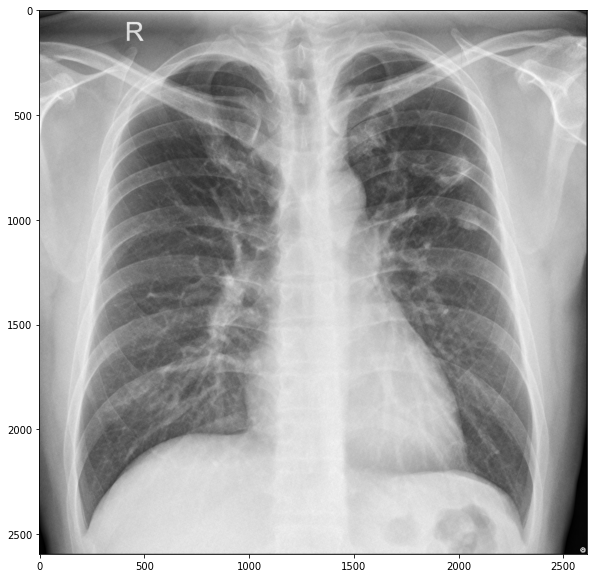

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [25]:
path = '../raw_data/ChinaSet_AllFiles/CXR_png'
img_PRC, target_PRC = load_pngs(10, get_all=False, get_random=True, balanced=True, path=path)
plt.subplots(figsize = (10,10))
plt.imshow(img_PRC[0])
plt.show()
print(target_PRC)

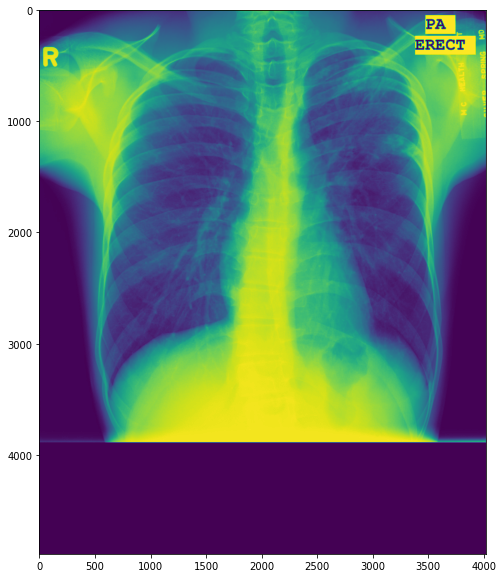

[(0, 4892, 4020), (1, 4020, 4892), (2, 4892, 4020), (3, 4892, 4020), (4, 4892, 4020), (5, 4020, 4892), (6, 4020, 4892), (7, 4892, 4020), (8, 4892, 4020), (9, 4892, 4020)]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [26]:
path = '../raw_data/raw_USA/CXR_png'
img_USA, target_USA = load_pngs(10, get_all=False, get_random=True, balanced=True, path=path)
plt.subplots(figsize = (10,10))
plt.imshow(img_USA[0])
plt.show()
print([(i, img_USA[i].shape[0], img_USA[i].shape[1]) for i in range(10) ])
print(target_USA)

In [76]:
print(img_USA[2].shape)
print(img_PRC[5].shape)

(4892, 4020, 1)
(2953, 2985, 3)


(4892, 4020, 1) (4020, 4892, 1)
(4020, 4892, 1) (4020, 4892, 1)


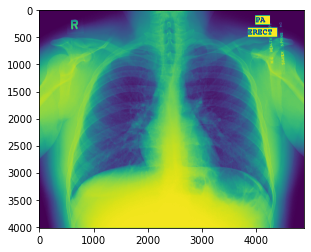

In [40]:
print(img_USA[0].shape, img_USA[1].shape)
print(img_USA[5].shape, img_USA[6].shape)
plt.imshow(img_USA[5])
plt.imshow(img_USA[6])
plt.show()

(4020, 4892, 1)


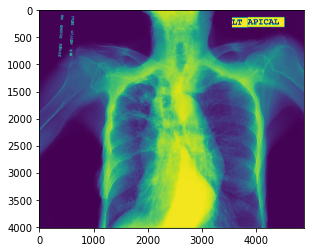

In [41]:
print(img_USA[1].shape)
plt.imshow(img_USA[1])
plt.show()

In [42]:
print(target_USA)
print(target_PRC)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


Now that we have the data, let's look at the dimensions of the files.

In [43]:
def dim_imgs(examples):
    return [(example.shape[0], example.shape[1]) for example in examples]

In [45]:
print(dim_imgs(img_PRC))
print(dim_imgs(img_USA))

[(2595, 2613), (2955, 2611), (2608, 2401), (2954, 2678), (2945, 2450), (2953, 2985), (2931, 3000), (2939, 2989), (2941, 3000), (2937, 3000)]
[(4892, 4020), (4020, 4892), (4892, 4020), (4892, 4020), (4892, 4020), (4020, 4892), (4020, 4892), (4892, 4020), (4892, 4020), (4892, 4020)]


In [48]:
path = '../raw_data/raw_USA/CXR_png'
print(f"Image height-data: {get_img_heights(path)}")
print(f"Image width-data: {get_img_widths(path)}")
path = '../raw_data/raw_China/CXR_png'
print(f"Image height-data: {get_img_heights(path)}")
print(f"Image width-data: {get_img_widths(path)}")

Image height-data: (4892, 4020, 4279.072463768116, 398.4879507876184)
Image width-data: (4892, 4020, 4632.927536231884, 398.4879507876184)
Image height-data: (3001, 1130, 2699.084592145015, 333.65897270223803)
Image width-data: (3001, 948, 2794.0694864048337, 300.74557103123294)


In [ ]:
spurious_funct_2()

In [ ]:
spurious_funct()

In [51]:
path = '../raw_data/raw_USA/CXR_png'
biggest_size = 4892
smallest_size = biggest_size
other_sizes = []
for size in get_img_sizes(path):
    big_size = max(size[0], size[1])
    if big_size > biggest_size:
        biggest_size = big_size
for size in get_img_sizes(path):
    small_size = min(size[0], size[1])
    if small_size < smallest_size:
        smallest_size = small_size
for size in get_img_sizes(path):
    if smallest_size != min(size[0], size[1]):
        other_sizes.append(min(size[0],size[1]))
    elif biggest_size != max(size[0], size[1]):
        other_sizes.append(max(size[0], size[1]))
print(biggest_size, smallest_size, len(other_sizes), len(get_img_sizes(path)))

4892 4020 0 138


In [52]:
path = '../raw_data/raw_China/CXR_png'
biggest_size = 4892
smallest_size = biggest_size
other_sizes = []
for size in get_img_sizes(path):
    big_size = max(size[0], size[1])
    if big_size > biggest_size:
        biggest_size = big_size
for size in get_img_sizes(path):
    small_size = min(size[0], size[1])
    if small_size < smallest_size:
        smallest_size = small_size
for size in get_img_sizes(path):
    if smallest_size != min(size[0], size[1]):
        other_sizes.append(min(size[0],size[1]))
    elif biggest_size != max(size[0], size[1]):
        other_sizes.append(max(size[0], size[1]))
print(biggest_size, smallest_size, len(other_sizes), len(get_img_sizes(path)))

4892 948 662 662


In [55]:
path = '../raw_data/raw_China/CXR_png'

for item, size in enumerate(get_img_sizes(path)[0:5]):
    print (size, item)

[2430 2651] 0
[2339 2940] 1
[2746 2916] 2
[2989 2943] 3
[3000 2951] 4


In [56]:
def might_rotate(path):
    square_img = []
    tall_img = []
    wide_img = []
    for item, size in enumerate(get_img_sizes(path)):
        if size[0] == size[1]:
            square_img.append(item)
        elif size[0] == min(size[0], size[1]):
            tall_img.append(item)
        else:
            wide_img.append(item)
#     square_imgs = pd.DataFrame(np.array(square_imgs))
#     tall_imgs = pd.Series(np.array(tall_imgs))
#     wide_imgs = pd.DataFrame(np.array(wide_imgs))
    return square_img, tall_img, wide_img

def square_imgs(path):
    return might_rotate(path)[0]

def tall_imgs(path):
    return might_rotate(path)[1]

def wide_imgs(path):
    return might_rotate(path)[2]

path = '../raw_data/raw_USA/CXR_png'
print(tall_imgs(path))
print(wide_imgs(path))

[1, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 20, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 40, 41, 42, 43, 49, 50, 51, 53, 54, 56, 57, 58, 60, 62, 63, 64, 65, 66, 68, 69, 70, 73, 74, 75, 79, 81, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 108, 111, 112, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137]
[0, 2, 5, 10, 18, 19, 21, 22, 23, 24, 29, 36, 39, 44, 45, 46, 47, 48, 52, 55, 59, 61, 67, 71, 72, 76, 77, 78, 80, 82, 83, 92, 99, 107, 109, 110, 113, 114, 123, 125, 128]
